In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *


# 🐼 Pandas Worksheet: Exploratory Analysis
---

#### Read in the ratings and movies tables

- Download the data from https://grouplens.org/datasets/movielens/
- Take the **small** dataset: `ml-latest-small.zip`
- Extract the tables from the `.zip` archive




#### Python's assert statement allows you to write sanity checks in your code. These checks are known as assertions, and you can use them to test if certain assumptions remain true while you're developing your code. If any of your assertions turn false, then you have a bug in your code

In [3]:
#read file 
movie = pd.read_csv("ml-latest-small/movies.csv")
rating = pd.read_csv("ml-latest-small/ratings.csv")

In [4]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# merge the two dataframe by matching id number
movie_rating = pd.merge(movie, rating, on="movieId")

In [7]:
movie_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [8]:
len(movie_rating)

100836

---
## Ratings table

#### How many unique users and movies are in the dataset?

In [9]:
# number of unique user
len(movie_rating['userId'].value_counts())

610

In [10]:
movie_rating['userId'].nunique()

610

In [11]:
# number of unique movie
movie_rating['movieId'].nunique()

9724

#### a) What is the average rating, b) which rating appears the most?

In [12]:
# average rating
movie_rating['rating'].mean()


3.501556983616962

In [13]:
# rating appears the most
movie_rating['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [14]:
# other method with idxmax and value_count to find most common value
movie_rating['rating'].value_counts().idxmax()

4.0

#### What is the percentage of 5 star ratings?

- ⭐**Bonus**: How are the ratings distributed? Derive a relative frequency table for the `rating` column!

<Axes: >

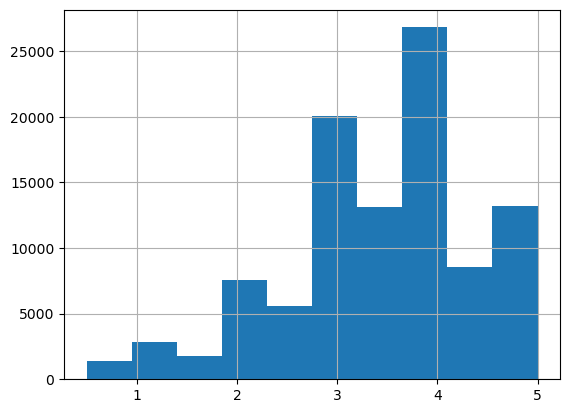

In [15]:
# rating distribution
movie_rating['rating'].hist()

In [16]:
# frequency of rating
freq = movie_rating['rating'].value_counts().nlargest().to_frame()
freq

,rating
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551


In [17]:
# probability
freq['prob']=freq.transform(lambda x: x/freq['rating'].sum())


In [18]:
freq

,rating,prob
4.0,26818,0.327997
3.0,20047,0.245184
5.0,13211,0.161577
3.5,13136,0.160659
4.5,8551,0.104583


#### Count the number of ratings *per* user

- Hint: Use a `groupby` statement and the `count` method

In [19]:
rate_user=movie_rating.groupby(by='userId')['rating'].count().to_frame()

In [20]:
rate_user.max()

rating    2698
dtype: int64

#### How many users have rated more than 20 movies?

In [21]:
(rate_user['rating']>20).sum()

596

#### a) How many movies rated the user with the most/ least ratings? b) What is the *median* number of ratings?

- use your results from the previous question

In [22]:
#rating median
movie_rating["rating"].median()

3.5

In [23]:
# movie rated by user with most rated
movie_rating.groupby(by=['userId'])['rating'].value_counts().nlargest()

userId  rating
414     4.0       903
599     2.5       690
414     3.0       658
599     3.0       624
474     3.5       580
Name: rating, dtype: int64

In [24]:
# movie rated by user with least rated


#### Draw a histogram or density plot of the distribution of the number of ratings per user! How would you characterize the distribution?

- use your results from the previous question
- Hint: `sns.histplot()`

<Axes: xlabel='userId', ylabel='rating'>

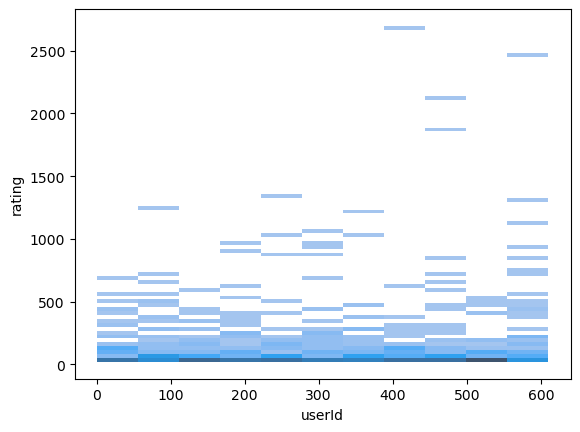

In [25]:
sns.histplot(data = rate_user, x='userId', y='rating')

#### Calculate the average rating *per user*

- Hint: use a `groupby` statement, select the `rating` column and apply the `mean` method

In [26]:
movie_rating.groupby(by='userId')['rating'].mean().to_frame()

,rating
userId,
1,4.366379
2,3.948276
3,2.435897
4,3.555556
5,3.636364
...,...
606,3.657399
607,3.786096
608,3.134176


--- 
## Movies table

#### Are there any duplicated titles?

Hint: use the `duplicated` method

In [27]:
movie_rating['title'].duplicated().value_counts()

True     91117
False     9719
Name: title, dtype: int64

#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

- Hint: Use the `isin()` method

In [28]:
#movie[movie.movieId.isin(rating)]
movie['movieId'].isin(rating['movieId']).value_counts()

True     9724
False      18
Name: movieId, dtype: int64

#### ⭐Bonus: Extract the year out of the title column

- Use the `pandas.Series.str.extract()` method with a regular expression
- Hint: check out the [following regular expression](https://regex101.com/r/dJkxR0/1)

In [29]:
movie['year']=movie["title"].str.extract(r'(\d{4})')
movie.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [30]:
movie['new_title']=movie["title"].str.extract(r'(^d*|[^0-9()]*)')
movie.head()

,movieId,title,genres,year,new_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,
4,5,Father of the Bride Part II (1995),Comedy,1995,


#### ⭐Bonus: Split the genre column into a separate genre table

1. Use the `pandas.Series.str.split` method
2. Then use the `pandas.Series.explode` method to clean up the list entries
3. Which `movieId` has the most genres assigned?

In [31]:
movie['new_genre']=movie['genres'].str.split(pat="|")
movie.head()

,movieId,title,genres,year,new_title,new_genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,1995,,[Comedy]


In [32]:
movie=movie.explode("new_genre")

In [33]:
movie.head()

,movieId,title,genres,year,new_title,new_genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,,Adventure
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,,Animation
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,,Children
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,,Comedy
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,,Fantasy


In [34]:
# movieId with most genres assigned
max_genre= movie.groupby(by="movieId")["new_genre"].count().to_frame()
max_genre.head()



,new_genre
movieId,
1,5
2,3
3,2
4,3
5,1


In [35]:
max_genre.loc[max_genre.idxmax()]

,new_genre
movieId,
81132,10


---
## Ratings and movies table

#### Merge/join the ratings and movies tables together

- use the `movieId` as common key
- hint: `df.merge(...)`

In [36]:
# merge the two dataframe by matching id number
rating_movie = pd.merge(movie, rating, on="movieId")
rating_movie.head()

,movieId,title,genres,year,new_title,new_genre,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,,Adventure,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,,Adventure,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,,Adventure,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,,Adventure,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,,Adventure,17,4.5,1305696483


In [37]:
rating_movie.shape

(274480, 9)

In [38]:
# check NaN rating 
rating_movie["rating"].isnull().sum()

0

### Pivot the table to get user/movie dataframe 
- hint: `pd.pivot_table(long_format, index=..., columns=..., values=...)`

In [39]:
movie_pivot = pd.pivot_table(rating_movie, index='userId', columns='title', values='rating')
movie_pivot.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Count the number of ratings per movie title!

In [40]:
movie_pivot.count()

title
'71 (2014)                                    1
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
                                             ..
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Length: 9719, dtype: int64

#### Use your previous results: What are the top 10 most rated movies in the dataset?

In [41]:
movie_pivot.count().nlargest(11)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Fight Club (1999)                            218
dtype: int64

#### Calculate the average rating per movie title!

In [42]:
np.mean(movie_pivot)

/home/ayouba/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Length: 9719, dtype: float64

#### Which movie was rated the best? Which movie was rated the worst?

- ⭐**Bonus**: Filter out movies that have been rated by less than 30 users. Do your results change? 

In [43]:
#Which movie was rated the best?

In [44]:
max(movie_pivot)

'À nous la liberté (Freedom for Us) (1931)'

In [45]:
# Which movie was rated the worst?
min(movie_pivot)

"'71 (2014)"

### Save to csv file the user/movie dataframe

In [46]:
movie_pivot.to_csv('user_movie.csv')

### Construct NMF 

In [47]:
movie_pivot.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Extract Movies
movies = list(movie_pivot.columns)
movies

["'71 (2014)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'Round Midnight (1986)",
 "'Salem's Lot (2004)",
 "'Til There Was You (1997)",
 "'Tis the Season for Love (2015)",
 "'burbs, The (1989)",
 "'night Mother (1986)",
 '(500) Days of Summer (2009)',
 '*batteries not included (1987)',
 '...All the Marbles (1981)',
 '...And Justice for All (1979)',
 '00 Schneider - Jagd auf Nihil Baxter (1994)',
 '1-900 (06) (1994)',
 '10 (1979)',
 '10 Cent Pistol (2015)',
 '10 Cloverfield Lane (2016)',
 '10 Items or Less (2006)',
 '10 Things I Hate About You (1999)',
 '10 Years (2011)',
 '10,000 BC (2008)',
 '100 Girls (2000)',
 '100 Streets (2016)',
 '101 Dalmatians (1996)',
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 "101 Dalmatians II: Patch's London Adventure (2003)",
 '101 Reykjavik (101 Reykjavík) (2000)',
 '102 Dalmatians (2000)',
 '10th & Wolf (2006)',
 '10th Kingdom, The (2000)',
 '10th Victim, The (La decima vittima) (1965)',
 '11\'09"01 - September 11 (2002)',
 '11:14 (2

In [49]:
# Extract Users 
users = list(movie_pivot.index)


In [50]:
# average rating for each movie
m=movie_pivot.mean()

In [51]:
# fillna by average rating for each movie
movie_user_fill = movie_pivot.fillna(value=m)

In [52]:
movie_user_fill.shape

(610, 9719)

In [53]:
from sklearn.decomposition import NMF

import pickle
import warnings
warnings.filterwarnings(action='ignore')

##### Matrix Q --- (nmf.components_)

#### MNF initializer
- sklearn.decomposition.NMF(n_components=None, *, init=None, solver='cd', beta_loss='frobenius', tol=0.0001, max_iter=200, random_state=None, alpha_W=0.0, alpha_H='same', l1_ratio=0.0, verbose=0, shuffle=False)[source]

In [54]:
# initiate NMF model
factorizer = NMF(n_components=10, max_iter=1000)

In [55]:
# fit model on the movie_user data
factorizer.fit(movie_user_fill)

NMF(max_iter=1000, n_components=10)

In [56]:
factorizer.reconstruction_err_

273.5853465015985

#### Method to improve NMF reconstruction error
- Increase the number of components (number of feature to include)
- change initialization method (init{‘random’, ‘nndsvd’, ‘nndsvda’, ‘nndsvdar’, ‘custom’},)

#### Find optimal number of component
- Information criteria: 
    - Akaike information criterion (AIC) 
    - Bayesian information criterion (BIC), 
- balance the trade-off between model complexity and goodness of fit.

In [57]:
q.shape[1]

NameError: name 'q' is not defined

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import time

def optimize_reconstrcut_error(p, q, r):
    
    # update 
    

In [ ]:
def optimal_component(matrix, n):
    """
    Estimate the best number of components to construct NMF
    """
    # Load data and preprocess
    X = matrix # movie_user_fill ## np.loadtxt('data.txt')
    #scaler = StandardScaler()
    #X_scaled = scaler.fit_transform(X)

    # Split data into training and validation sets
   # X_train, X_val = train_test_split(X, test_size=0.5, random_state=42)

    # Set range of number of components to evaluate
    n_components_range = range(1, n)

    # Initialize list to store AIC and BIC values
    aics = []
    bics = []
    err_ = []
    timer = 0
    n=1000

    # Loop over number of components
    for n_components in n_components_range:
        start_time = time.time()
        
        # Fit NMF model on training data
        nmf = NMF(n_components=n_components, init= 'random', random_state=42)
        W_train = nmf.fit_transform(X)
        H_train = nmf.components_
        
        # Compute reconstruction error on validation data
        X_val_reconstructed = np.dot(W_train, H_train)
        
        #reconstruction error for each element of P.Q
        #reconstruction_error = mean_squared_error(X_val, X_val_reconstructed) 
       
        # summe of elt wise reconstruction error
        err1_= nmf.reconstruction_err_
        
        #print (f"--{rec}---{err1_}")
        
        # Compute AIC and BIC 
        # compute log likehood
        log_likelihood = np.sum(X * np.log(np.maximum(X_val_reconstructed, np.finfo(float).eps) - X_val_reconstructed))
        k = n_components * (X.shape[1] + X.shape[0])
        aic = -2*log_likelihood + 2 * k
        bic = -2*log_likelihood + np.log(X.size) * k
        
        
        # Append AIC, BIC and reconstruction error values to list
        aics.append(aic)
        bics.append(bic)
        err_.append(err1_)
        
        end_time = time.time()
        duration = end_time - start_time
        print(f"Iteration number:------- {n_components} ---- finish in : {round(duration, 3)} seconds")        
        timer +=duration
        
        #update error for minimum 
        
        if err1_ < n:
            n = err1_
            # best component for minimum error
            b_comp=n_components
                  
        
    timer = timer/60
    print (f"Time total of program execution : {round(timer, 3)} min")
    
    return aics, bics, err_, n, b_comp



In [ ]:
aics, bics, error, n , b= optimal_component(movie_user_fill, 10)

In [ ]:
# Select optimal number of components based on minimum BIC
#optimal_n_components = min(bics, aics, error) 
print('Optimal number of components:', b)#optimal_n_components)

In [ ]:
# Plot AIC and BIC values as a function of number of components
n_components_range = range(1, 10)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))

fig, ax = plt.subplots()
ax.plot(n_components_range, aics, label='AIC')
ax.plot(n_components_range, bics, label='BIC')
ax.plot(n_components_range, error, label='Reconstruction_error')
ax.set_xlabel('Number of components')
ax.set_ylabel('Information criterion')
ax.legend()
plt.show()



#### Initialize model with optimal component


In [119]:
factorizer = NMF(n_components= 30, max_iter=1000)

In [120]:
factorizer.fit(movie_user_fill)

NMF(max_iter=1000, n_components=30)

In [121]:
factorizer.reconstruction_err_

235.1164271814269

#### Get Q Matrix


In [122]:
q = factorizer.components_

In [123]:
# add q matrix in dataframe
q = pd.DataFrame(q, columns=movies)
q.head()

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,1.828797,1.828797,1.579975,2.327361,1.873232,0.571346,1.330786,1.330511,1.330488,0.501127,...,0.571346,1.786355,0.530121,1.330511,1.330511,1.658248,0.957142,0.811712,0.174648,0.319643
1,17.442960,17.442960,15.216024,21.893405,17.514485,6.250370,2.150498,12.984167,2.206402,10.383769,...,6.250370,13.328725,12.451899,12.984167,12.984167,8.280318,2.619912,7.629686,0.992842,4.001046
2,0.000000,0.000000,0.000000,0.000000,0.279706,0.000000,5.727291,0.000000,19.583990,1.810182,...,0.000000,0.000000,2.537204,0.000000,0.000000,0.051974,2.725815,0.887498,3.481824,0.003644
3,5.824707,5.824707,5.299423,6.855478,5.305574,3.399712,19.645298,4.794879,15.242225,12.094225,...,3.399712,6.636816,19.734052,4.794879,4.794879,15.963774,12.167576,4.748566,16.164117,2.934017
4,6.896068,6.896068,6.029196,8.633235,6.743964,2.584688,11.964841,5.166057,5.251086,3.922559,...,2.584688,7.684150,4.950674,5.166057,5.166057,5.646642,0.000000,2.560679,4.948383,1.727860


In [124]:
# save q_matrix
q.to_csv('q_matrix.csv')

In [141]:
r = pd.read_csv('q_matrix.csv', index_col=0)
r.head()

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,1.828797,1.828797,1.579975,2.327361,1.873232,0.571346,1.330786,1.330511,1.330488,0.501127,...,0.571346,1.786355,0.530121,1.330511,1.330511,1.658248,0.957142,0.811712,0.174648,0.319643
1,17.442960,17.442960,15.216024,21.893405,17.514485,6.250370,2.150498,12.984167,2.206402,10.383769,...,6.250370,13.328725,12.451899,12.984167,12.984167,8.280318,2.619912,7.629686,0.992842,4.001046
2,0.000000,0.000000,0.000000,0.000000,0.279706,0.000000,5.727291,0.000000,19.583990,1.810182,...,0.000000,0.000000,2.537204,0.000000,0.000000,0.051974,2.725815,0.887498,3.481824,0.003644
3,5.824707,5.824707,5.299423,6.855478,5.305574,3.399712,19.645298,4.794879,15.242225,12.094225,...,3.399712,6.636816,19.734052,4.794879,4.794879,15.963774,12.167576,4.748566,16.164117,2.934017
4,6.896068,6.896068,6.029196,8.633235,6.743964,2.584688,11.964841,5.166057,5.251086,3.922559,...,2.584688,7.684150,4.950674,5.166057,5.166057,5.646642,0.000000,2.560679,4.948383,1.727860


In [125]:
q.shape

(30, 9719)

In [126]:
list(q.columns)

["'71 (2014)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'Round Midnight (1986)",
 "'Salem's Lot (2004)",
 "'Til There Was You (1997)",
 "'Tis the Season for Love (2015)",
 "'burbs, The (1989)",
 "'night Mother (1986)",
 '(500) Days of Summer (2009)',
 '*batteries not included (1987)',
 '...All the Marbles (1981)',
 '...And Justice for All (1979)',
 '00 Schneider - Jagd auf Nihil Baxter (1994)',
 '1-900 (06) (1994)',
 '10 (1979)',
 '10 Cent Pistol (2015)',
 '10 Cloverfield Lane (2016)',
 '10 Items or Less (2006)',
 '10 Things I Hate About You (1999)',
 '10 Years (2011)',
 '10,000 BC (2008)',
 '100 Girls (2000)',
 '100 Streets (2016)',
 '101 Dalmatians (1996)',
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 "101 Dalmatians II: Patch's London Adventure (2003)",
 '101 Reykjavik (101 Reykjavík) (2000)',
 '102 Dalmatians (2000)',
 '10th & Wolf (2006)',
 '10th Kingdom, The (2000)',
 '10th Victim, The (La decima vittima) (1965)',
 '11\'09"01 - September 11 (2002)',
 '11:14 (2

#### Create P matrix

In [127]:
p = factorizer.transform(movie_user_fill)
p.shape

(610, 30)

In [128]:
p

array([[2.24987913e-01, 2.64355647e-02, 3.71377730e-03, ...,
        0.00000000e+00, 0.00000000e+00, 2.56990105e-01],
       [1.96090753e-01, 3.18830749e-02, 2.09916577e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.88450018e-01],
       [1.36501807e-01, 3.28890000e-02, 1.47839926e-03, ...,
        0.00000000e+00, 1.16205430e-03, 1.47539029e-01],
       ...,
       [7.93897409e-03, 5.97335950e-02, 0.00000000e+00, ...,
        1.45044140e-01, 0.00000000e+00, 3.07366755e-01],
       [1.78140432e-01, 3.13364383e-02, 1.52226361e-03, ...,
        1.43691695e-03, 0.00000000e+00, 1.83891762e-01],
       [2.99176182e-01, 4.84528846e-02, 6.38767310e-03, ...,
        0.00000000e+00, 2.18639945e-04, 1.26601849e-01]])

In [129]:
# add p matrix in a dataframe
p = pd.DataFrame(p, index=users)

In [130]:
p.shape

(610, 30)

#### Reconstruct the rating matrix

In [131]:
m_rec = np.dot(p,q)

#### Pickle model (Binary string)

In [132]:
with open('factorize_model.pkl', 'wb') as recom_model:
    pickle.dump(factorizer, recom_model)

In [133]:
def recommender(query, model, q_matrix, k=5):
    
    """"
    Filter and recommends the top k movies for any given query 
    Return list of k movie ids
    """
    recommendations = []
    dict_ ={}
    
    
    # assign random rating to the given films
    
    for st in query:
        dict_[st] = random.randint(1,5)
    
    # load model
    
    #with open ('model.pkl', 'rb') as file_:
    #    fit_model = pickle.load(file_)
    
    # create dataframe to store movie and rating
    
    user_rate = pd.DataFrame(dict_, index=['new_user'], columns= list(q_matrix.columns))
    
    # fill missing value 
    user_rate = user_rate.fillna(value=random.randint(0,3))
    
    # user P matrix 
    p = model.transform(user_rate)
    
    # store user P matrix in dataframe 
    p = pd.DataFrame(p, index = ['new_user'])
    
    # Reconstruct user_movie matrix (user P matrix  x q)
    R_hat = np.dot(p, q_matrix)
    
    # store reconstruct matrix in dataframe
    R_hat = pd.DataFrame(R_hat, index= ['new_user'], columns=list(q_matrix.columns))
    
    #Transpose R_hat matrx
    R_hat_tranp = R_hat.T.sort_values(by='new_user', ascending=False)
    
    # make recommendations
    for movie in list(R_hat_tranp.index):
        if movie not in list(dict_.keys()):
            recommendations.append(movie)
    
    return recommendations[:k]
    
    
    

In [134]:
import random

In [135]:
query = ["'71 (2014)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'Round Midnight (1986)",
 "'Salem's Lot (2004)"]


In [136]:
with open ('factorize_model.pkl', 'rb') as file_:
        fit_model = pickle.load(file_)

In [137]:
recommender(query,fit_model, q)
    

['12 Angry Men (1997)',
 '12 Chairs (1976)',
 'Blue Planet II (2017)',
 'Strictly Sexual (2008)',
 'Bloodsucking Bastards (2015)']

#### Cosine Simularity

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

##### Steps to take in order to make recommendations based on neighborhood-based collaborative filtering using Cosine Similarity

    - create initial-matrix
    - create user_item-matrix (here: fill NAs with 0; important: we did not center around the mean)
    - implement the cosine similarity-function (optionally: import it from sklearn)
    - create/implement user_user-matrix
    - "create" new user
    - extract unseen movies for new user
    - get most similar users who have seen the movie
    - implement weighted average ratings; weight with similarity "factor"
    - make recommendations



In [ ]:
cos_mat = movie_user_fill.T
cos_mat.head()

In [ ]:
# cosine similarity matrix
cos_m = cosine_similarity(cos_mat.T)


In [ ]:
# store in dataframe

In [ ]:
cos_m= pd.DataFrame(cos_m, index=cos_mat.columns, columns=cos_mat.columns)
cos_m.head()

In [ ]:
# explore unseen movie of a user from database
# look to the initial unfill matrix
init_mat = movie_pivot.T


In [ ]:
# unseen movie by user
user = 20
unseen_movie = init_mat[init_mat[user].isna()].index
unseen_movie

In [ ]:
## look at the top five user of the movie database
t_five = cos_m[user].sort_values(ascending=False).index[1:6]
t_five

In [87]:
def recommander_cos_similarity(user, matrix, expect_rate):
    
    
    movie_user_mat = matrix
    
    # fillna if exist whith mean mean value of rating of each movie
    if movie_user_mat.isnull().values.any():
        movie_user_fill = movie_user_mat.fillna(value=movie_user_mat.mean())
    
    # Transpose fill matrix to have user as column
    
    movie_user_fill = movie_user_fill.T
    
    # compute similarity matrix 
    movie_user_sim = cosine_similarity(movie_user_fill.T)
    
    # store similarity matrix in a dataframe (index and column = user)
    movie_user_sim = pd.DataFrame(movie_user_sim, index=movie_user_fill.columns, columns=movie_user_fill.columns)
    
    # explore unseen movie of a user from database
    # look to the initial matrix before filling nan
    # Transpose to have user as columns of the matrix
    movie_user_mat = movie_user_mat.T
    
    # unseen movie of a given user
    unseen_movie = movie_user_mat[movie_user_mat[user].isna()].index
    
    # Search for top five user of the movie database
    t_five = movie_user_sim[user].sort_values(ascending=False).index[1:6]

    dict_= {}
    dict_2 = []
    # Make recommendation based on the top five user
    for movie in unseen_movie:
        # ~ negate the boolean mask, hier return movie that not na
        # Applies a boolean mask to the columns, selecting only columns 
        # where the value for a specific row (specified by the movie variable) is not null (i.e., not NaN).   
        other_users = movie_user_mat.columns[~movie_user_mat.loc[movie].isna()]
    
        #set is a collection of unique elements, meaning that it only 
        # contains one instance of each distinct element
        others_users = set(other_users)
    
        num=0
        den=0
        ratings=0
        
    
        for users in other_users.intersection(set(t_five)):
            # calculate intersection of two set
            # return only elt contain in both set (t_five and other_user)
            rating = movie_user_fill[user][movie]
            similarity = movie_user_sim[user][users]
            num = num + (rating*similarity)
            den = den + similarity + 0.0001 #to avoid zero division
        
            ratings = num/den
     
            # print recommendation of movie if ratings is higher than a value 
            if ratings > expect_rate:
                print(movie, round(ratings, 2))
                
                dict_= {'movie':movie, 'rating':round(ratings,1)}
                dict_2.append(dict_)
    
    # Convert each dictionary to a tuple and add it to a set to remove duplicates
    unique_tuples = set(tuple(sorted(d.items())) for d in dict_2)
    
    # Convert each unique tuple back to a dictionary and add it to a list
    unique_dicts = [dict(t) for t in unique_tuples]
            
            
    return unique_dicts
                
        

        
    
    
    
    
    

In [88]:
recommander_cos_similarity(40, movie_pivot, 4)

Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001) 4.18
Chinatown (1974) 4.21
Dark Knight, The (2008) 4.24
Departed, The (2006) 4.25
Fight Club (1999) 4.27
Forrest Gump (1994) 4.16
Forrest Gump (1994) 4.16
Forrest Gump (1994) 4.16
Inception (2010) 4.07
Inception (2010) 4.07
Logan (2017) 4.28
Lord of the Rings: The Fellowship of the Ring, The (2001) 4.11
Lord of the Rings: The Return of the King, The (2003) 4.12
Lord of the Rings: The Two Towers, The (2002) 4.02
Matrix, The (1999) 4.19
Matrix, The (1999) 4.19
Monty Python and the Holy Grail (1975) 4.16
Network (1976) 4.02
Saving Private Ryan (1998) 4.15
Schindler's List (1993) 4.22
Schindler's List (1993) 4.22
Schindler's List (1993) 4.22
Silence of the Lambs, The (1991) 4.16
Silence of the Lambs, The (1991) 4.16
Spirited Away (Sen to Chihiro no kamikakushi) (2001) 4.15
This Is Spinal Tap (1984) 4.01
Up (2009) 4.0
Usual Suspects, The (1995) 4.24


[{'movie': 'Fight Club (1999)', 'rating': 4.3},
 {'movie': 'Departed, The (2006)', 'rating': 4.3},
 {'movie': 'Logan (2017)', 'rating': 4.3},
 {'movie': 'Lord of the Rings: The Return of the King, The (2003)',
  'rating': 4.1},
 {'movie': 'Inception (2010)', 'rating': 4.1},
 {'movie': 'This Is Spinal Tap (1984)', 'rating': 4.0},
 {'movie': 'Network (1976)', 'rating': 4.0},
 {'movie': 'Lord of the Rings: The Two Towers, The (2002)', 'rating': 4.0},
 {'movie': "Schindler's List (1993)", 'rating': 4.2},
 {'movie': 'Usual Suspects, The (1995)', 'rating': 4.2},
 {'movie': 'Forrest Gump (1994)', 'rating': 4.2},
 {'movie': 'Saving Private Ryan (1998)', 'rating': 4.1},
 {'movie': 'Chinatown (1974)', 'rating': 4.2},
 {'movie': 'Monty Python and the Holy Grail (1975)', 'rating': 4.2},
 {'movie': 'Silence of the Lambs, The (1991)', 'rating': 4.2},
 {'movie': 'Dark Knight, The (2008)', 'rating': 4.2},
 {'movie': 'Lord of the Rings: The Fellowship of the Ring, The (2001)',
  'rating': 4.1},
 {'movi